<a href="https://colab.research.google.com/github/GyeonggeonChoi/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding='utf-8', sep=',', header=0, index_col=None, skiprows=None, nrows=None)

print(df)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open('data.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)
print(data)
## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', orient='records', encoding='utf-8', lines=False)
print(df)

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]}
                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,...


## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성
pattern = re.compile(r'(\d{6})-(\d{7})')

## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******', content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301_masked.log', mode='w') as f:
    f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url, params=params)
    response.raise_for_status()

    ## JSON 데이터 읽기
    data = response.json()


    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.02002716064453125, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-09-16T14:15', 'interval': 900, 'temperature_2m': 23.6}}
서울시 종로구의 현재 온도는 : 23.6°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115M  100  115M    0     0   296M      0 --:--:-- --:--:-- --:--:--  297M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.9 MB/132 MB of archives.
After this operation, 447 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 mesa-vulkan-drivers amd64 23.2.1-1ubuntu3.1~22.04.3 [10.7

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://professor.knou.ac.kr/jaehwachung/index.do'
driver.get(url)

## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

title_text = tree.xpath('//title/text()')
print(title_text)

## 드라이버 종료
driver.quit()

['\n\t\tAlert \n\t\t\n\t']



# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 교재를 통해 포털 가입하고 api key 발급을 받아야 한다

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
api_key = ''

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params=params)

## 호출 성공/실패 출력
print(response.json())


{'response': {'body': {'totalCount': 40, 'items': [{'so2Grade': '1', 'coFlag': None, 'khaiValue': '46', 'so2Value': '0.002', 'coValue': '0.2', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '8', 'khaiGrade': '1', 'pm25Value': '5', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-21 23:00', 'coGrade': '1', 'no2Value': '0.012', 'stationName': '중구', 'pm10Grade': '1', 'o3Value': '0.028'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '37', 'so2Value': '0.003', 'coValue': '0.4', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '8', 'khaiGrade': '1', 'pm25Value': '5', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': None, 'so2Flag': None, 'dataTime': '2025-09-21 23:00', 'coGrade': '1', 'no2Value': '0.012', 'stationName': '한강대로', 'pm10Grade': '1', 'o3Value': '0.022'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '-', 'so2Value': '0.002', 'coValue': '0

# 중간과제물 연습장

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,350 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype

       연도   월      전기사용량         가스사용량         수도사용량       지역난방사용량  year  \
0    2015   1  193784708  5.913372e+07  1.281976e+07  2.274084e+07  2015   
1    2015   2  189974230  5.648736e+07  1.265689e+07  1.879332e+07  2015   
2    2015   3  175215719  4.998487e+07  1.265547e+07  1.382635e+07  2015   
3    2015   4  183891769  3.730684e+07  1.295477e+07  5.836003e+06  2015   
4    2015   5  177289769  2.206089e+07  1.308673e+07  1.320896e+06  2015   
5    2015   6  186073153  1.267764e+07  1.424165e+07  2.943126e+05  2015   
6    2015   7  165114568  8.893640e+06  1.208388e+07  7.028636e+05  2015   
7    2015   8  242000479  7.619018e+06  1.516455e+07  4.602890e+05  2015   
8    2015   9  207540868  6.518422e+06  1.441908e+07  3.057107e+05  2015   
9    2015  10  186473958  8.924018e+06  1.471183e+07  3.167520e+06  2015   
10   2015  11  196892030  2.032256e+07  1.369267e+07  1.121098e+07  2015   
11   2015  12  203388142  4.009523e+07  1.390416e+07  2.110262e+07  2015   
12   2016   

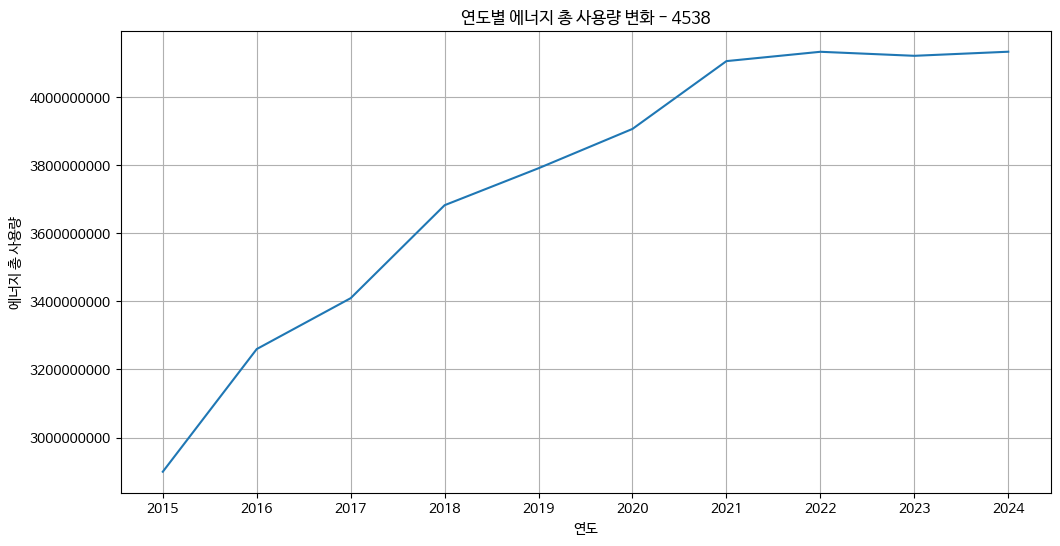

In [23]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = ''
energy_data = []


def get_year_month():
    year_month = []
    for year in range(2015, 2024+1):
        for month in range(1, 12+1):
            year_month.append((year, f'{month:02d}'))
    return year_month


try:
    for year, month in get_year_month():
        url = f'http://openapi.seoul.go.kr:8088/{API_KEY}/json/energyUseDataSummaryInfo/1/100/{year}/{month}'

        response = requests.get(url)
        response.raise_for_status()

        data = response.json()
        data_rows = data['energyUseDataSummaryInfo']['row']

        for row in data_rows:
            if row['MM_TYPE'] != '개인':
                continue

            record = {
                '연도': row['YEAR'],
                '월': row['MON'],
                '전기사용량': row['EUS'],
                '가스사용량': row['GUS'],
                '수도사용량': row['WUS'],
                '지역난방사용량': row['HUS']
            }
            energy_data.append(record)

    df = pd.DataFrame(energy_data)

    ym_cols = ['연도', '월']
    usage_cols = ['전기사용량', '가스사용량', '수도사용량', '지역난방사용량']
    df[ym_cols] = df[ym_cols].apply(pd.to_numeric, errors='coerce')
    df[usage_cols] = df[usage_cols].apply(pd.to_numeric, errors='coerce')

    df['year'] = df['연도']
    df['season'] = df['월'].apply(lambda x: '겨울' if x <= 2 or x == 12 else
                                            '봄' if 3 <= x <= 5 else
                                            '여름' if 6 <= x <= 8 else
                                            '가을' if 9 <= x <= 11 else
                                            None)


    df['총사용량'] = df[usage_cols].sum(axis=1)
    print(df)
    total_usage = df.groupby('year')['총사용량'].sum().reset_index()
    print(total_usage)

    plt.rc('font', family='NanumBarunGothic')
    plt.figure(figsize=(12, 6))
    plt.plot(total_usage['year'], total_usage['총사용량'])
    plt.title("연도별 에너지 총 사용량 변화 - 4538")
    plt.xlabel("연도")
    plt.ylabel("에너지 총 사용량")
    plt.xticks(total_usage['year'])
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True)
    plt.show()


except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")
except Exception as e:
    print(f"예외 발생: {e}")

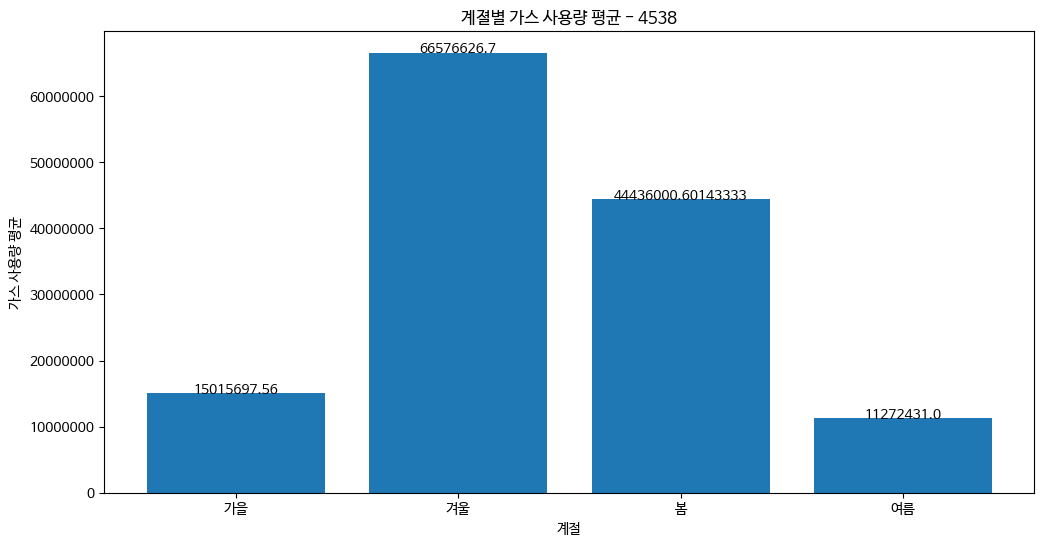

In [24]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = ''
energy_data = []


def get_year_month():
    year_month = []
    for year in range(2015, 2024+1):
        for month in range(1, 12+1):
            year_month.append((year, f'{month:02d}'))
    return year_month


try:
    for year, month in get_year_month():
        url = f'http://openapi.seoul.go.kr:8088/{API_KEY}/json/energyUseDataSummaryInfo/1/100/{year}/{month}'

        response = requests.get(url)
        response.raise_for_status()

        data = response.json()
        data_rows = data['energyUseDataSummaryInfo']['row']

        for row in data_rows:
            if row['MM_TYPE'] != '개인':
                continue

            record = {
                '연도': row['YEAR'],
                '월': row['MON'],
                '전기사용량': row['EUS'],
                '가스사용량': row['GUS'],
                '수도사용량': row['WUS'],
                '지역난방사용량': row['HUS']
            }
            energy_data.append(record)

    df = pd.DataFrame(energy_data)

    ym_cols = ['연도', '월']
    usage_cols = ['전기사용량', '가스사용량', '수도사용량', '지역난방사용량']
    df[ym_cols] = df[ym_cols].apply(pd.to_numeric, errors='coerce')
    df[usage_cols] = df[usage_cols].apply(pd.to_numeric, errors='coerce')

    df['year'] = df['연도']
    df['season'] = df['월'].apply(lambda x: '겨울' if x <= 2 or x == 12 else
                                            '봄' if 3 <= x <= 5 else
                                            '여름' if 6 <= x <= 8 else
                                            '가을' if 9 <= x <= 11 else
                                            None)

    total_season = df.groupby('season')['가스사용량'].mean().reset_index()

    plt.rc('font', family='NanumBarunGothic')
    plt.figure(figsize=(12, 6))
    plt.bar(total_season['season'], total_season['가스사용량'])
    plt.title("계졀별 가스 사용량 평균 - 4538")
    plt.xlabel("계절")
    plt.ylabel("가스 사용량 평균")
    plt.ticklabel_format(style='plain', axis='y')

    for season in range(len(total_season)):
        value = total_season.loc[season, '가스사용량']
        plt.text(season, value, str(value), ha='center')

    plt.show()


except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")
except Exception as e:
    print(f"예외 발생: {e}")

In [8]:
import requests
import json
import pandas as pd

API_KEY = ''
energy_data = []

def get_year_month():
    year_month = []
    for year in range(2015, 2024+1):
        for month in range(1, 12+1):
            year_month.append((year, f'{month:02d}'))
    return year_month

try:
    for year, month in get_year_month():
        url = f'http://openapi.seoul.go.kr:8088/{API_KEY}/json/energyUseDataSummaryInfo/1/100/{year}/{month}'

        response = requests.get(url)
        response.raise_for_status()

        data = response.json()
        data_rows = data['energyUseDataSummaryInfo']['row']

        for row in data_rows:
            if row['MM_TYPE'] != '개인':
                continue

            record = {
                '연도': row['YEAR'],
                '월': row['MON'],
                '전기사용량': row['EUS'],
                '가스사용량': row['GUS'],
                '수도사용량': row['WUS'],
                '지역난방사용량': row['HUS']
            }
            energy_data.append(record)

    df = pd.DataFrame(energy_data)

    ym_cols = ['연도', '월']
    usage_cols = ['전기사용량', '가스사용량', '수도사용량', '지역난방사용량']
    df[ym_cols] = df[ym_cols].apply(pd.to_numeric, errors='coerce')
    df[usage_cols] = df[usage_cols].apply(pd.to_numeric, errors='coerce')

    df['year'] = df['연도']
    df['season'] = df['월'].apply(lambda x: '겨울' if x <= 2 or x == 12 else
                                            '봄' if 3 <= x <= 5 else
                                            '여름' if 6 <= x <= 8 else
                                            '가을' if 9 <= x <= 11 else
                                            None)

    print(df.head())

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")
except Exception as e:
    print(f"예외 발생: {e}")


     연도  월      전기사용량       가스사용량         수도사용량       지역난방사용량  year season
0  2015  1  193784708  59133720.0  1.281976e+07  2.274084e+07  2015     겨울
1  2015  2  189974230  56487358.0  1.265689e+07  1.879332e+07  2015     겨울
2  2015  3  175215719  49984873.0  1.265547e+07  1.382635e+07  2015      봄
3  2015  4  183891769  37306841.0  1.295477e+07  5.836003e+06  2015      봄
4  2015  5  177289769  22060892.0  1.308673e+07  1.320896e+06  2015      봄


In [22]:
import requests
import json

API_KEY = ''
energy_data = []

def get_year_month():
    year_month = []
    for year in range(2015, 2024+1):
        for month in range(1, 12+1):
            year_month.append((year, f'{month:02d}'))
    return year_month

try:
    for year, month in get_year_month():
        url = f'http://openapi.seoul.go.kr:8088/{API_KEY}/json/energyUseDataSummaryInfo/1/100/{year}/{month}'

        response = requests.get(url)
        response.raise_for_status()

        data = response.json()
        data_rows = data['energyUseDataSummaryInfo']['row']

        for row in data_rows:
            if row['MM_TYPE'] != '개인':
                continue

            record = {
                '연도': row['YEAR'],
                '월': row['MON'],
                '전기사용량': row['EUS'],
                '가스사용량': row['GUS'],
                '수도사용량': row['WUS'],
                '지역난방사용량': row['HUS']
            }
            energy_data.append(record)

    df = pd.DataFrame(energy_data)

    ym_cols = ['연도', '월']
    usage_cols = ['전기사용량', '가스사용량', '수도사용량', '지역난방사용량']
    df[ym_cols] = df[ym_cols].apply(pd.to_numeric, errors='coerce')
    df[usage_cols] = df[usage_cols].apply(pd.to_numeric, errors='coerce')

    df['year'] = df['연도']
    df['season'] = df['월'].apply(lambda x: '겨울' if x <= 2 or x == 12 else
                                            '봄' if 3 <= x <= 5 else
                                            '여름' if 6 <= x <= 8 else
                                            '가을' if 9 <= x <= 11 else
                                            None)
    print(df.head(20))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")
except Exception as e:
    print(f"예외 발생: {e}")


      연도   월      전기사용량       가스사용량         수도사용량       지역난방사용량  year season
0   2015   1  193784708  59133720.0  1.281976e+07  2.274084e+07  2015     겨울
1   2015   2  189974230  56487358.0  1.265689e+07  1.879332e+07  2015     겨울
2   2015   3  175215719  49984873.0  1.265547e+07  1.382635e+07  2015      봄
3   2015   4  183891769  37306841.0  1.295477e+07  5.836003e+06  2015      봄
4   2015   5  177289769  22060892.0  1.308673e+07  1.320896e+06  2015      봄
5   2015   6  186073153  12677645.0  1.424165e+07  2.943126e+05  2015     여름
6   2015   7  165114568   8893640.0  1.208388e+07  7.028636e+05  2015     여름
7   2015   8  242000479   7619018.0  1.516455e+07  4.602890e+05  2015     여름
8   2015   9  207540868   6518422.0  1.441908e+07  3.057107e+05  2015     가을
9   2015  10  186473958   8924018.0  1.471183e+07  3.167520e+06  2015     가을
10  2015  11  196892030  20322557.0  1.369267e+07  1.121098e+07  2015     가을
11  2015  12  203388142  40095231.0  1.390416e+07  2.110262e+07  2015     겨울